In [29]:
# ---- LEVEL 3  ----
#--- TASK 1: Predictive Modeling ----

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
# 1. Load dataset
df = pd.read_csv("Dataset1.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
# --- Step A: Feature Selection ---
# Select useful features (drop IDs and highly text-based columns)
features = [
    "Country Code", "City", "Cuisines", "Average Cost for two",
    "Price range", "Has Table booking", "Has Online delivery", "Votes"
]
target = "Aggregate rating"

data = df[features + [target]].copy()

In [20]:
# Encode categorical features
for col in ["City", "Cuisines", "Has Table booking", "Has Online delivery"]:
    data[col] = data[col].astype(str).str.strip().str.title()
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [21]:
# Drop missing values if any
data = data.dropna()

X = data.drop(columns=[target])
y = data[target]


In [22]:
# --- Step B: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# --- Step C: Train Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[name] = {"R2 Score": r2, "MSE": mse}

In [24]:
# --- Step D: Print Results ---
print("\nModel Performance Comparison:")
for model, metrics in results.items():
    print(f"{model}: R2 Score = {metrics['R2 Score']:.3f}, MSE = {metrics['MSE']:.3f}")


Model Performance Comparison:
Linear Regression: R2 Score = 0.300, MSE = 1.594
Decision Tree: R2 Score = 0.921, MSE = 0.179
Random Forest: R2 Score = 0.956, MSE = 0.101


In [ ]:

#----TASK 2: Customer Preference Analysis ----


In [30]:
# --- Step A: Preprocess cuisines (split multiple cuisines into separate rows) ---
cuisines_df = (
    df[["Cuisines", "Aggregate rating", "Votes"]]
    .dropna()
    .assign(Cuisines=df["Cuisines"].astype(str).str.split(","))
    .explode("Cuisines")
)
cuisines_df["Cuisines"] = cuisines_df["Cuisines"].str.strip()


Average Rating by Cuisine (Top 10):
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


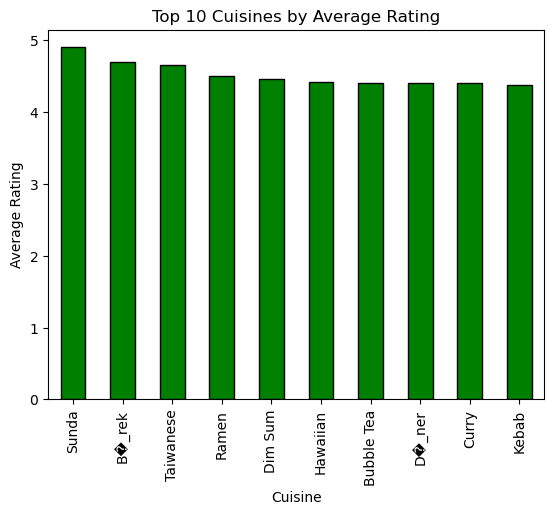

In [31]:
# --- Step B: Relationship between cuisine and rating (average rating per cuisine) ---
avg_rating_by_cuisine = cuisines_df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)
print("\nAverage Rating by Cuisine (Top 10):")
print(avg_rating_by_cuisine.head(10))

avg_rating_by_cuisine.head(10).plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()


Most Popular Cuisines (Top 10 by Aggregate Rating):
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


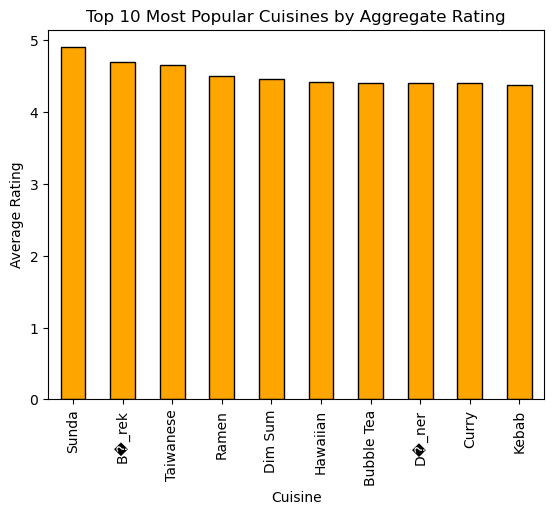

In [40]:
# --- Step C: Most popular cuisines (by total votes) ---
popular_cuisines = cuisines_df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)

print("\nMost Popular Cuisines (Top 10 by Aggregate Rating):")
print(popular_cuisines.head(10))

popular_cuisines.head(10).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Most Popular Cuisines by Aggregate Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()


In [ ]:

#-- TASK 3: Data Visualization ----


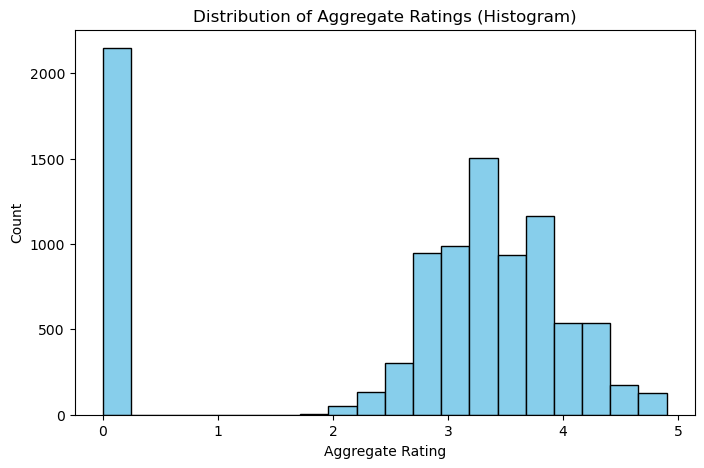

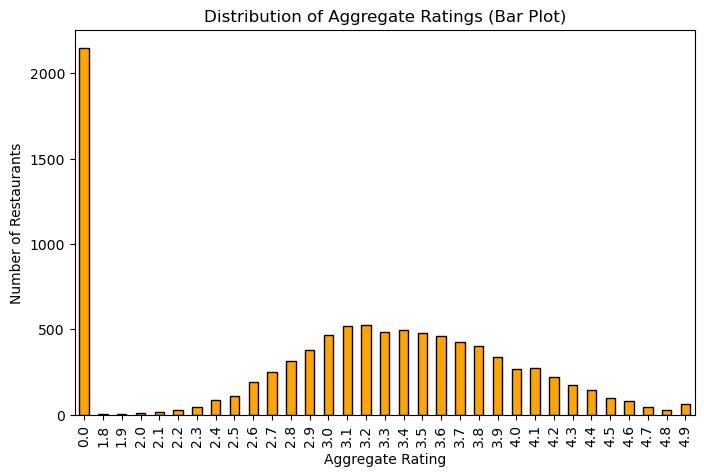

In [32]:
# --- Step A: Distribution of ratings ---
plt.figure(figsize=(8,5))
plt.hist(df["Aggregate rating"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Aggregate Ratings (Histogram)")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

df["Aggregate rating"].value_counts().sort_index().plot(
    kind="bar", color="orange", edgecolor="black", figsize=(8,5)
)
plt.title("Distribution of Aggregate Ratings (Bar Plot)")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()


Top 10 Cuisines by Average Rating:
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


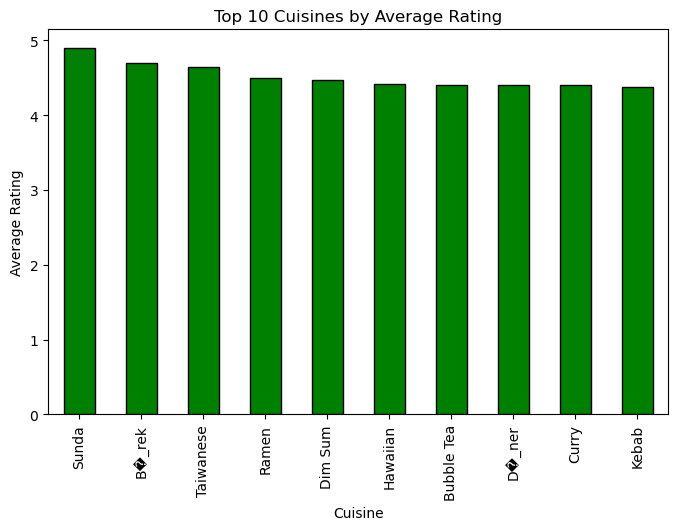

In [33]:
# --- Step B: Compare average ratings of cuisines ---
cuisines_df = (
    df[["Cuisines", "Aggregate rating"]]
    .dropna()
    .assign(Cuisines=df["Cuisines"].astype(str).str.split(","))
    .explode("Cuisines")
)
cuisines_df["Cuisines"] = cuisines_df["Cuisines"].str.strip()

avg_rating_cuisine = cuisines_df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cuisines by Average Rating:")
print(avg_rating_cuisine)

avg_rating_cuisine.plot(kind="bar", color="green", edgecolor="black", figsize=(8,5))
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()



Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


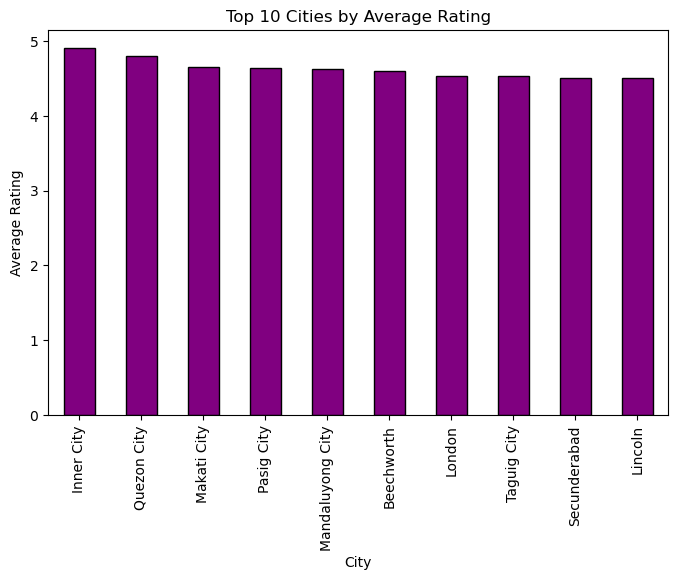

In [34]:
# --- Step C: Compare average ratings of cities ---
avg_rating_city = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Average Rating:")
print(avg_rating_city)

avg_rating_city.plot(kind="bar", color="purple", edgecolor="black", figsize=(8,5))
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.show()


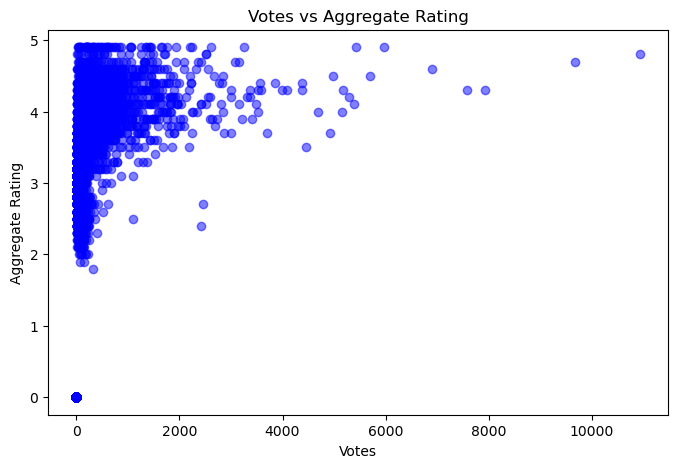

In [35]:
# --- Step D: Relationship between features and target variable ---

# Votes vs Aggregate Rating
plt.figure(figsize=(8,5))
plt.scatter(df["Votes"], df["Aggregate rating"], alpha=0.5, color="blue")
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()

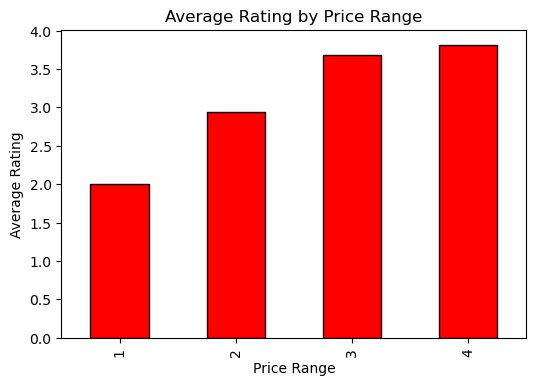

In [36]:
# Price Range vs Aggregate Rating
avg_price_rating = df.groupby("Price range")["Aggregate rating"].mean()
avg_price_rating.plot(kind="bar", color="red", edgecolor="black", figsize=(6,4))
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()

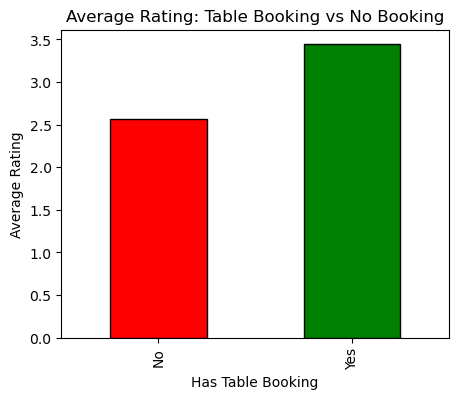

In [37]:
# Table Booking vs Aggregate Rating
df.groupby("Has Table booking")["Aggregate rating"].mean().plot(
    kind="bar", color=["red","green"], edgecolor="black", figsize=(5,4)
)
plt.title("Average Rating: Table Booking vs No Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Average Rating")
plt.show()